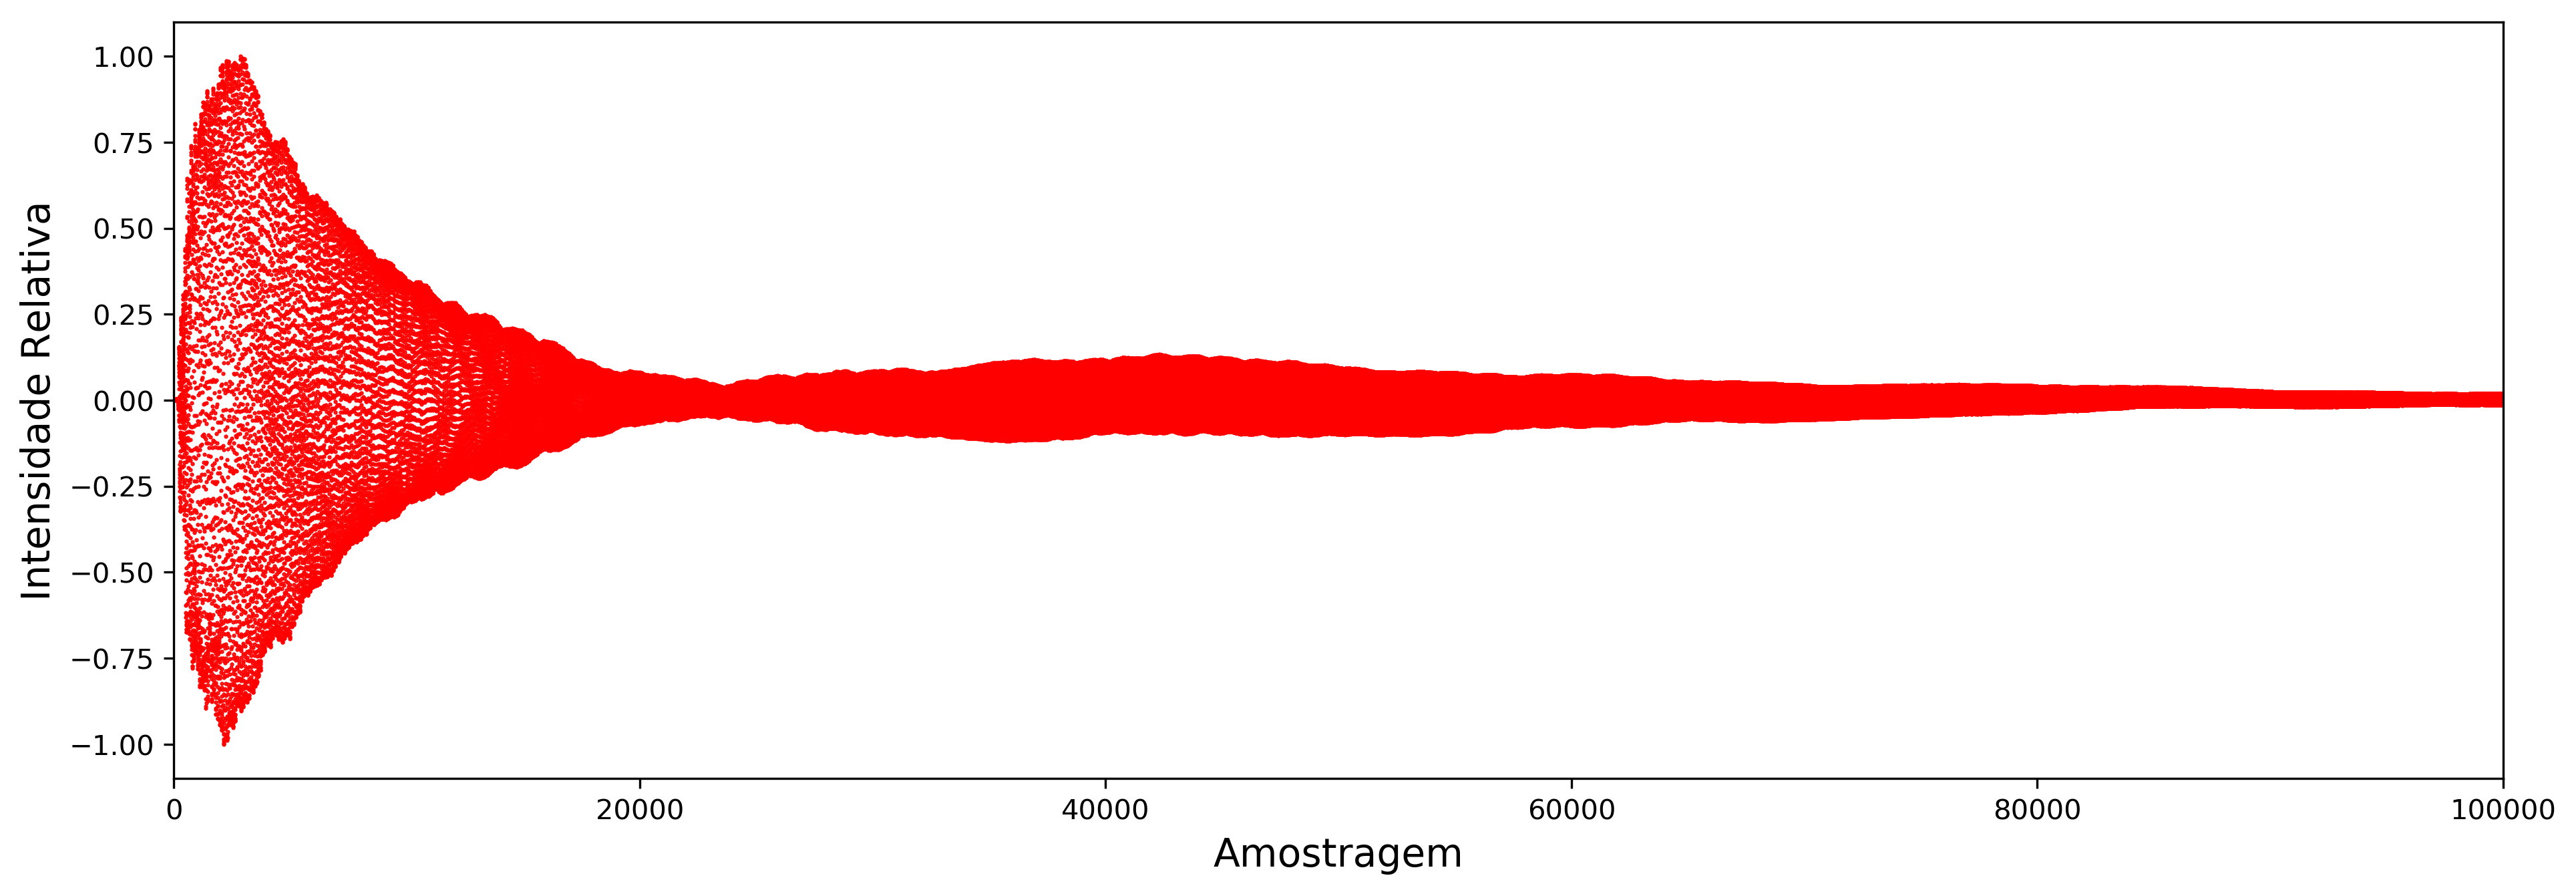

As frequências principais são, em Hz:  [ 524.79  1051.344 1578.339]


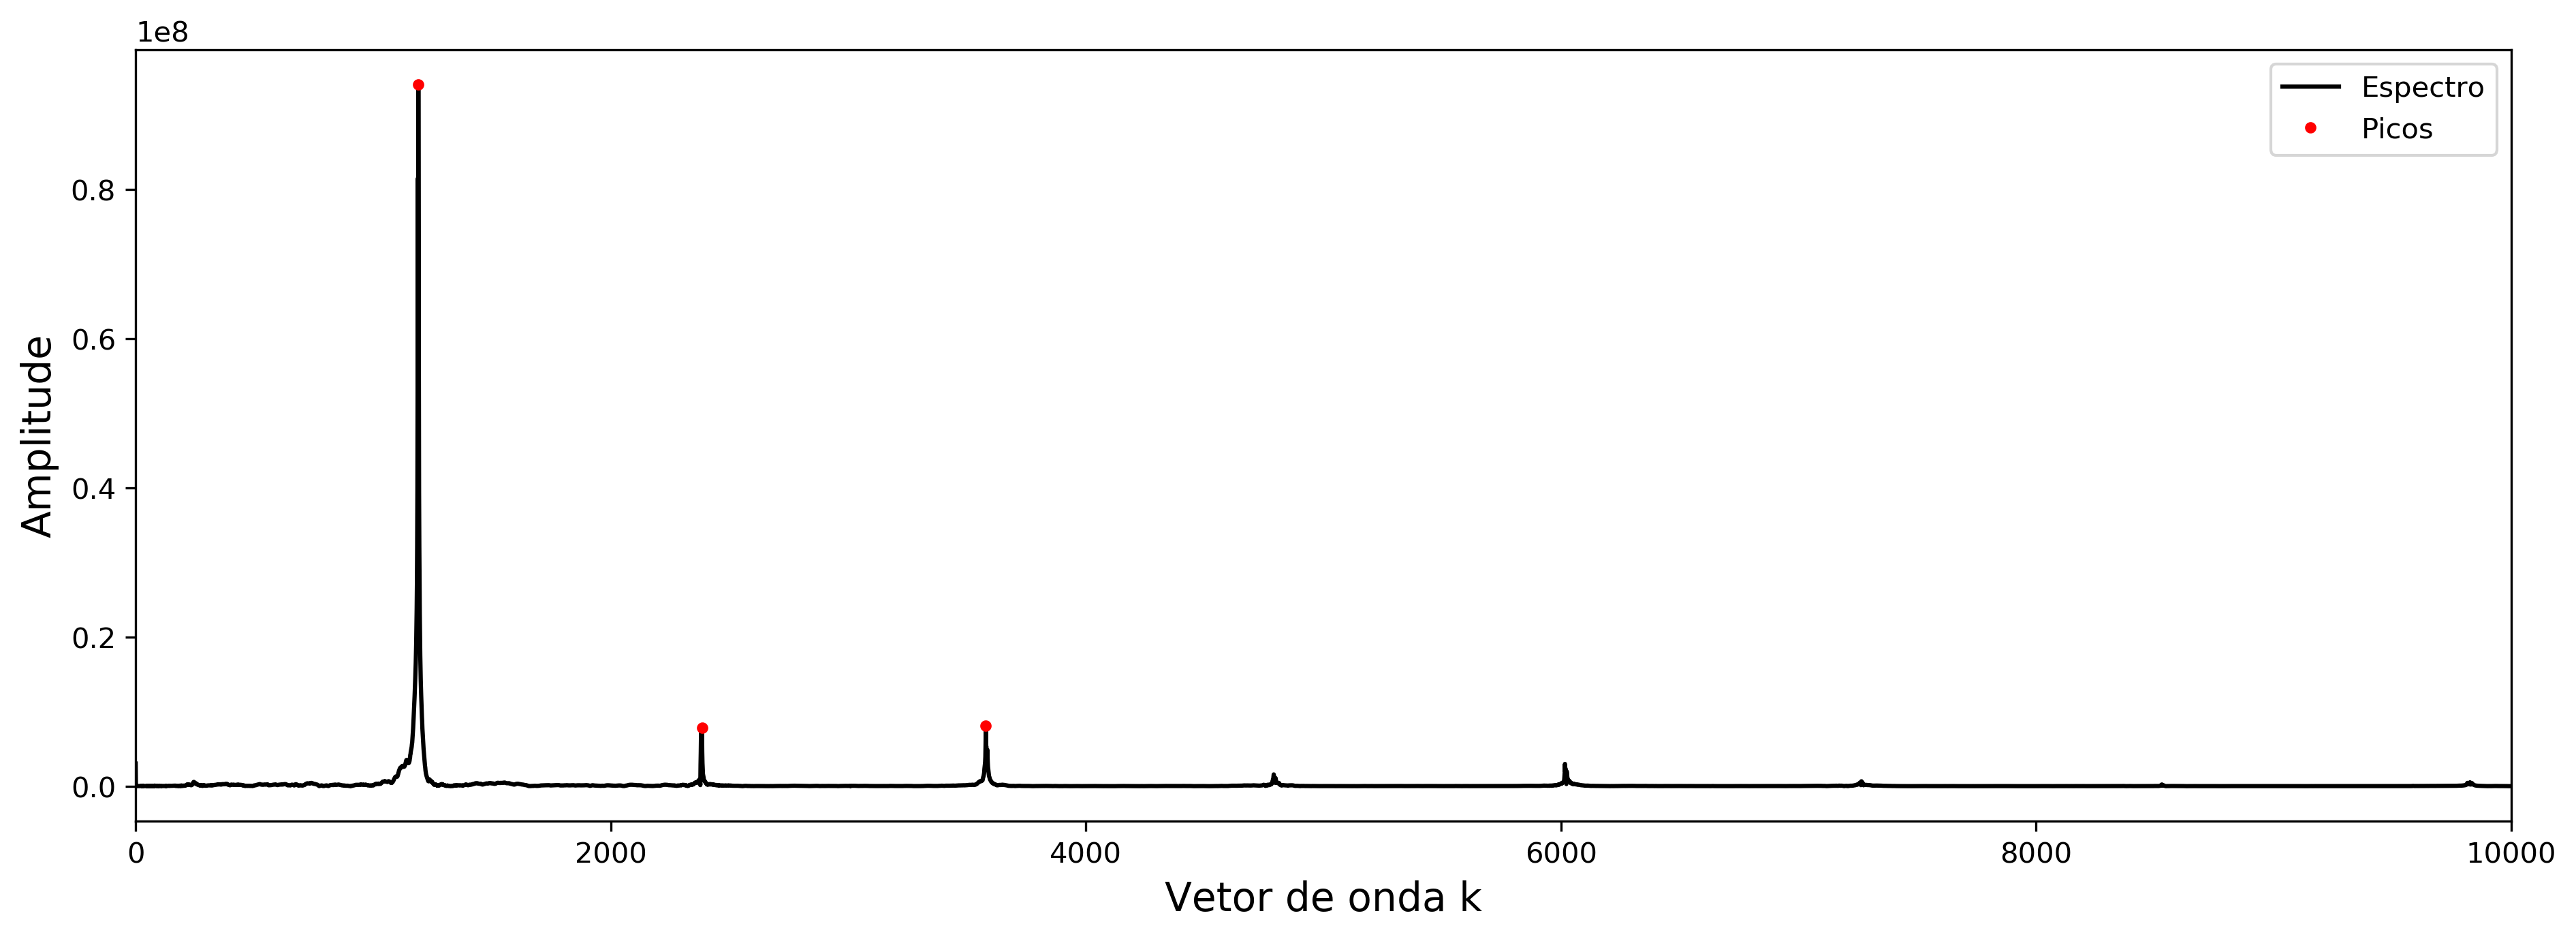

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ATENÇÃO: Para o funcionamento deste código é
# necessário que o pacote 'scipy' esteja atualizado

###########################################################
#--Esta função tem o próposito de analisar o espectro-----#
#--de frequencias de um array unidimensional. Além--------#
#--do array, a função também recebe como argumento o------#
#--número de coeficientes que interessa. As frequências---#
#--correspondentes aos picos no espectro são entregues.---#
#--Se temos N dados, coletados em uma frequência de 'F_s'-#
#--pontos por segundo, então a relação entre índice k e---#
#--frequência 'f' em Hz é dada por: f = F_s*k/N.----------#
###########################################################

def FT_analys(f,M):
    n = range(len(f))
    
    # Gráfico do array original
    plt.figure(figsize = (15,5), dpi = 300)
    plt.plot(n, f/max(f), '.r', markersize = 1)
    plt.xlim(0,len(f))
    plt.xlabel("Amostragem", size = 14)
    plt.ylabel("Intensidade Relativa", size = 14)
    plt.show()
    
    # ck_sk: Módulo ao quadrado dos coeficientes de FT
    # F_s:   Frequência de coleta do Sinal
    
    ck_sq = abs(np.fft.fft(f)[:M])
    F_s   = 44100    #[Hz]
    
    # Índice dos picos no expectro
    peaks = find_peaks(ck_sq, distance = 500, height = 0.3e7)[0]
    print("As frequências principais são, em Hz: ", peaks*F_s/len(f))
    
    # Gráfico do espectro reduzido mostrando os picos de frequência
    plt.figure(figsize = (15,5), dpi = 300)
    plt.plot(n[:M], ck_sq, '-k', label = 'Espectro')
    plt.plot(peaks, ck_sq[peaks], '.r', label = 'Picos')
    plt.xlim(0,M)
    plt.xlabel("Vetor de onda k", size = 14)
    plt.ylabel("Amplitude", size = 14)
    plt.legend(loc = 'best')
    plt.savefig('im_7_3b2')
    plt.show()

    
# Leitura dos dados dos instrumentos
trumpet = np.loadtxt('trumpet.txt')
piano   = np.loadtxt('piano.txt')

# M:     Número de coeficientes de interesse no espectro.
M = 10000
FT_analys(trumpet, M)
FT_analys(piano, M)